In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Load the CNN data
df_cnn = pd.read_csv(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\analyzed_data\cnn_sentiment.csv')

# Load the Fox News data
df_fox = pd.read_csv(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\analyzed_data\fox_sentiment.csv')



In [4]:
df_cnn

,title,clean_date,sentiment,topic_inflation,topic_taxes,topic_stocks,topic_jobs,topic_housing,topic_energy,topic_crypto
0,Why car prices won’t stop rising,2025-12-03,0,1,1,1,1,1,1,0
1,Instacart’s AI technology is hiking prices as ...,2025-12-10,0,1,1,0,1,1,0,0
2,Major milestone: US gas prices drop below $3 a...,2025-12-02,1,1,1,1,0,1,1,0
3,Trump admin says drug price negotiations will ...,2025-11-25,0,1,1,0,0,1,0,0
4,"Sorry, America. Coffee prices probably aren’t ...",2025-11-13,0,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2307,What rising interest rates mean for you,2022-09-21,0,1,1,0,0,1,1,0
2308,Meme stocks have revolutionized investor days,2023-03-01,0,1,1,1,1,1,1,0
2309,Bitcoin price falls after Russia attacks Ukraine,2022-02-24,0,0,0,0,0,0,0,1
2310,It’s market bulls vs. Fed hawks on Wall Street,2023-02-23,0,1,1,1,0,1,0,0


In [5]:
df_fox

,title,clean_date,sentiment,topic_inflation,topic_taxes,topic_stocks,topic_jobs,topic_housing,topic_energy,topic_crypto
0,Trump drops receipts on US savings since Biden...,2025-12-17,1,1,1,0,1,1,1,0
1,Trump touts bringing country back from 'brink ...,2025-12-17,1,1,1,0,1,0,0,0
2,Trump set to address the nation in primetime W...,2025-12-17,1,1,1,1,1,1,1,0
3,"Fox News Poll: As prices pinch, voters see Tru...",2025-12-17,0,1,1,0,1,1,1,0
4,Washington Post blasts rent control as 'failed...,2025-12-17,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
633,Why inflation is making us have fewer babies,2024-07-25,0,1,0,0,1,1,1,0
634,Trump's record far superior to Biden's on debt...,2024-07-15,0,1,1,1,0,1,1,0
635,Lawmakers warn EPA its ‘Clean Power Plan 2.0’ ...,2024-07-12,0,1,1,0,1,0,1,0
636,America's next national security crisis is lur...,2024-07-11,0,0,1,0,0,1,0,0


Dropping articles before 2025

In [6]:
# Convert the date column to datetime
df_cnn['clean_date'] = pd.to_datetime(df_cnn['clean_date'])

# Keep only rows from 2025 onward
df_cnn = df_cnn[df_cnn['clean_date'].dt.year >= 2025]

# Optional: reset index
df_cnn = df_cnn.reset_index(drop=True)


In [7]:
# Convert the date column to datetime
df_fox['clean_date'] = pd.to_datetime(df_fox['clean_date'])

# Keep only rows from 2025 onward
df_fox = df_fox[df_fox['clean_date'].dt.year >= 2025]

# Optional: reset index
df_fox = df_fox.reset_index(drop=True)

In [8]:
df_cnn

,title,clean_date,sentiment,topic_inflation,topic_taxes,topic_stocks,topic_jobs,topic_housing,topic_energy,topic_crypto
0,Why car prices won’t stop rising,2025-12-03,0,1,1,1,1,1,1,0
1,Instacart’s AI technology is hiking prices as ...,2025-12-10,0,1,1,0,1,1,0,0
2,Major milestone: US gas prices drop below $3 a...,2025-12-02,1,1,1,1,0,1,1,0
3,Trump admin says drug price negotiations will ...,2025-11-25,0,1,1,0,0,1,0,0
4,"Sorry, America. Coffee prices probably aren’t ...",2025-11-13,0,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
550,From minimum wage increases to Medicare drug c...,2025-01-01,1,1,1,0,0,1,1,0
551,Senate Republicans unveil plan for cuts to Med...,2025-06-16,0,0,1,0,1,1,1,0
552,Americans have a new thing to worry about: A s...,2025-12-19,0,1,1,0,1,0,0,0
553,"Congress leaves town until 2026, letting enhan...",2025-12-19,0,1,1,0,0,0,1,0


In [9]:
df_fox

,title,clean_date,sentiment,topic_inflation,topic_taxes,topic_stocks,topic_jobs,topic_housing,topic_energy,topic_crypto
0,Trump drops receipts on US savings since Biden...,2025-12-17,1,1,1,0,1,1,1,0
1,Trump touts bringing country back from 'brink ...,2025-12-17,1,1,1,0,1,0,0,0
2,Trump set to address the nation in primetime W...,2025-12-17,1,1,1,1,1,1,1,0
3,"Fox News Poll: As prices pinch, voters see Tru...",2025-12-17,0,1,1,0,1,1,1,0
4,Washington Post blasts rent control as 'failed...,2025-12-17,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
417,Schumer says Dems must ‘look in the mirror’ af...,2025-01-05,0,0,0,0,0,0,0,0
418,5 New Year’s money resolutions if you want to ...,2025-01-04,1,1,0,0,0,0,1,0
419,Washington state Democrats accidentally email ...,2025-01-03,0,0,1,0,0,1,0,0
420,3 ways Trump can deliver an economic 'golden a...,2025-01-03,1,0,1,0,1,0,1,0


In [10]:
df_cnn["source"] = "CNN"
df_fox["source"] = "Fox"

In [11]:
df = pd.concat([df_cnn, df_fox], ignore_index=True)

In [12]:
1-df_cnn["sentiment"].mean()

0.8522522522522522

In [13]:
1 - df_fox["sentiment"].mean()

0.5900473933649288

### Overall sentiment comparison

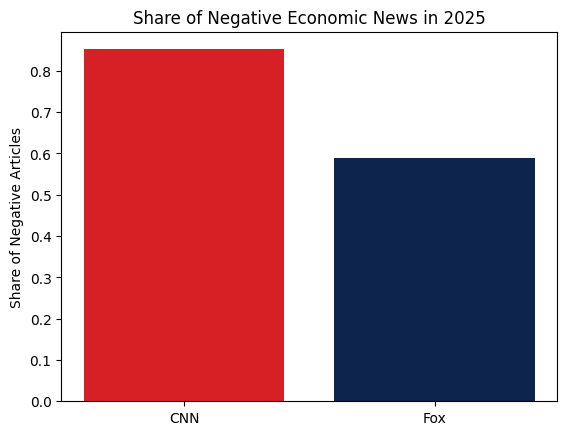

In [14]:
sentiment_share = (
    df.groupby("source")["sentiment"]
      .mean()
      .reset_index()
)
sentiment_share["negative_share"] = 1 - sentiment_share["sentiment"]

colors = ['#D71F26', '#0D254C']
plt.bar(sentiment_share["source"], sentiment_share["negative_share"], color = colors)
plt.ylabel("Share of Negative Articles")
plt.title("Share of Negative Economic News in 2025")

plt.savefig(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\figs_report\average.png')

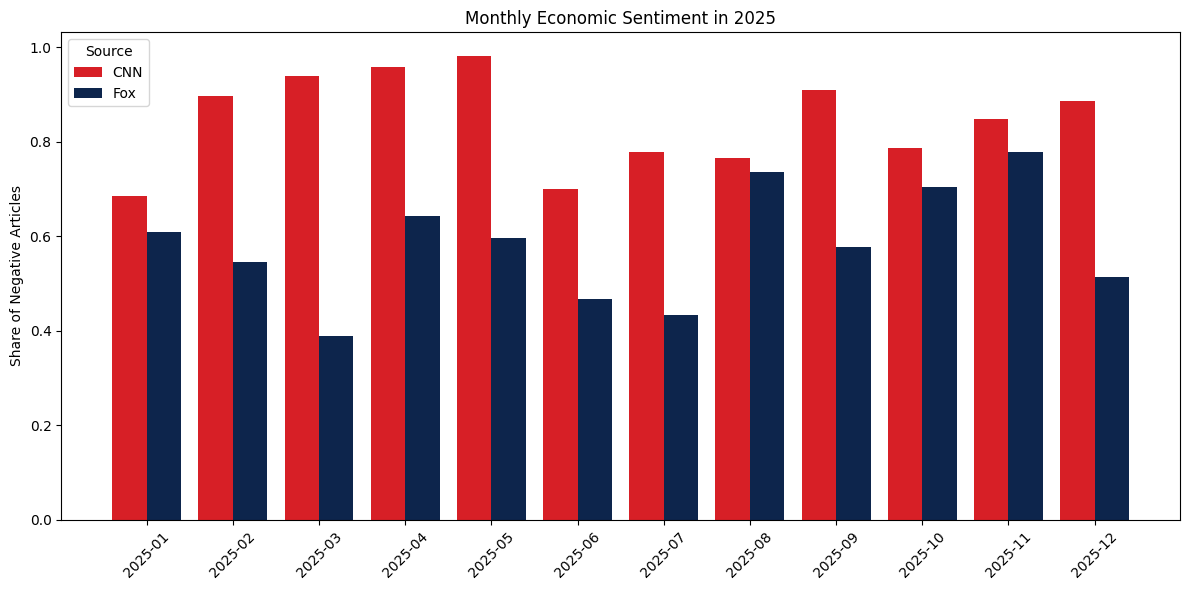

In [15]:
# Prepare data
df["month"] = df["clean_date"].dt.to_period("M")

monthly_sentiment = (
    df.groupby(["month", "source"])["sentiment"]
      .mean()
      .reset_index()
)
monthly_sentiment["negative_share"] = 1 - monthly_sentiment["sentiment"]

# Pivot the table
pivot_df = monthly_sentiment.pivot(index="month", columns="source", values="negative_share")

# --- COLOR & SORTING LOGIC ---
# Ensure CNN is first, Fox is second for consistent coloring
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)
# CNN (Blue) first, Fox (Red) second
custom_colors = ['#D71F26','#0D254C'] 
# -----------------------------

months = pivot_df.index.astype(str)
sources = pivot_df.columns
x = np.arange(len(months))
width = 0.8 / len(sources)

fig, ax = plt.subplots(figsize=(12,6))

for i, src in enumerate(sources):
    # Use color=custom_colors[i] to assign the specific hex code
    ax.bar(x + i*width, pivot_df[src], width=width, label=src, color=custom_colors[i])

ax.set_xticks(x + width*(len(sources)-1)/2)
ax.set_xticklabels(months, rotation=45)
ax.set_ylabel("Share of Negative Articles")
ax.set_title("Monthly Economic Sentiment in 2025")
ax.legend(title="Source")

# Remember to save before show if you want to keep the file!
if not os.path.exists('figs_report'):
    os.makedirs('figs_report')
plt.savefig(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\figs_report\monthly_trend.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

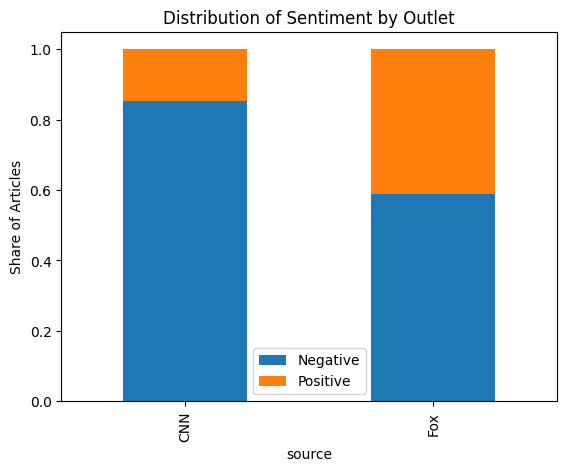

In [16]:
dist = (
    df.groupby(["source", "sentiment"])
      .size()
      .unstack()
      .fillna(0)
)
dist = dist.div(dist.sum(axis=1), axis=0)

dist.plot(kind="bar", stacked=True)
plt.ylabel("Share of Articles")
plt.title("Distribution of Sentiment by Outlet")
plt.legend(["Negative", "Positive"])
plt.show()

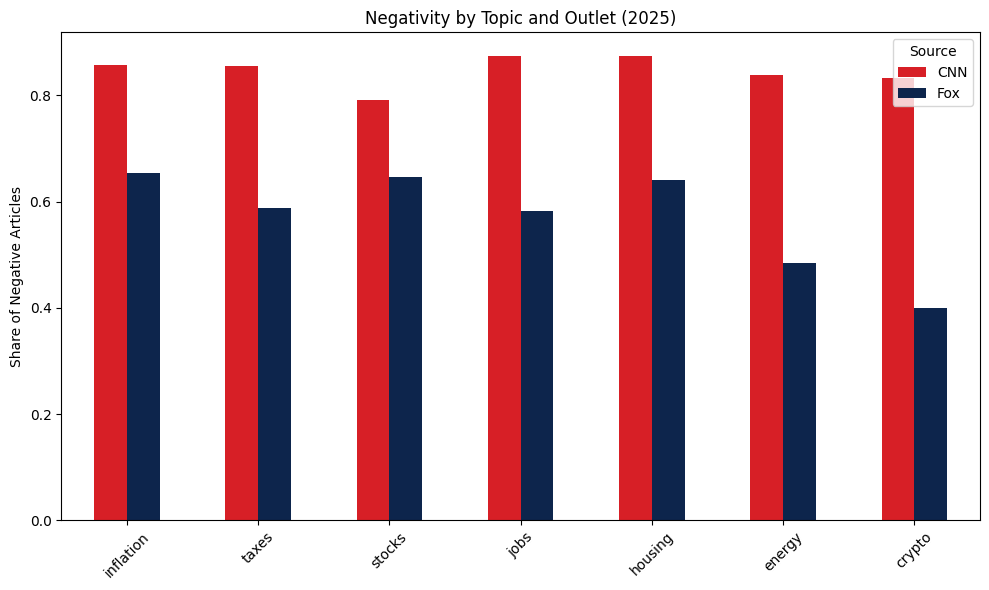

In [17]:
# 1. Setup Data Processing
topics = [
    "topic_inflation", "topic_taxes", "topic_stocks",
    "topic_jobs", "topic_housing", "topic_energy", "topic_crypto"
]

topic_results = []
for t in topics:
    temp = df[df[t] == 1]
    res = temp.groupby("source")["sentiment"].mean()
    topic_results.append(res)

# 2. Create and Clean DataFrame
topic_df = pd.concat(topic_results, axis=1)
topic_df.columns = [t.replace("topic_", "") for t in topics]
topic_df = 1 - topic_df 

# 3. Transpose and Sort for Color Consistency
# Transposing makes topics the X-axis and sources the legend/bars
plot_df = topic_df.T 

# Sort columns alphabetically to ensure CNN is index 0 and Fox is index 1
# (C comes before F)
plot_df = plot_df.reindex(sorted(plot_df.columns), axis=1)

# Define Colors: CNN (Blue) first, Fox (Red) second
# Blue: '#0D254C', Red: '#D71F26'
custom_colors = ['#D71F26','#0D254C']

# 4. Visualization
# We pass the color list here. Since CNN is the first column, it gets the first color.
ax = plot_df.plot(kind="bar", figsize=(10, 6), color=custom_colors)

plt.ylabel("Share of Negative Articles")
plt.title("Negativity by Topic and Outlet (2025)")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()

# 5. Save and Show Logic
if not os.path.exists('figs_report'):
    os.makedirs('figs_report')

# Save first, then show
plt.savefig(r'C:\Users\Enkhsaikhan\Data-engineering-scrap\figs_report\topics', dpi=300, bbox_inches='tight')
plt.show()